# 머신러닝(Machine Learning)

## 선형 회귀와 의사결정나무(Linear Regression & Decision Tree Regressor) - 당뇨병 진행 예측 예제

### 1. 데이터 전처리(data pre-processing); EDA

In [12]:
# 오늘은 scikit learn에서 제공하는 당뇨병(diabetes) 진행 데이터셋을 사용하겠습니다.
# 먼저 필요한 라이브러리를 가져옵시다.

from sklearn.datasets import load_diabetes  # 데이터셋이 있는 라이브러리를 scikit learn 사이트로부터 가져옵니다.
import pandas as pd                         # 얘는 저번주에도 봤었죠? 표를 만들어주는 친구입니다.

# 데이터셋 불러오기
diabetes = load_diabetes()

# 데이터셋과 정답데이터를 가져오기
dataset, target = diabetes["data"], diabetes["target"]  # 데이터셋의 정답은 일반적으로 target이라고 지칭합니다.

# 데이터셋을 표로 만들기
data = pd.DataFrame(data = dataset, columns = diabetes["feature_names"])

# 데이터의 주요 통계 정보 보여줌
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [13]:
# 위 표를 읽는 법을 잠깐 알려드리겠습니다.

# count: 각 열에 존재하는 값의 수
# mean: 각 열의 평균
# std: 각 열의 표준편차
# min/max: 각 열의 최솟값/최댓값
# 25%~75%: 각 열의 값들을 4분위 수로 나타냈을 때, 각 %에 해당하는 값

# 우리는 이를 이용해서 이상치가 존재하는지, 수들이 어떻게 분포해 있는지, 어떤 경향성이 있는지 확인할 수 있습니다.
# 현재 데이터는 한번 처리가 된 데이터이기에 분포가 깔끔합니다만, 실제 세상에 존재하는 데이터(ex 공모전이나 대회에서 사용하는 데이터)를 사용하실 때는 값들의 범위를 정리하는 scaling을 수행하셔야합니다.
# scaling에 대해서는 앞으로 더 많은 데이터를 사용하면서 차차 알려드리겠습니다 :)

In [14]:
# 우리가 저번주에 했던 것처럼 빈 값이 있는지 확인해봅시다.

# 결측치 확인
data.isnull().sum()  # 결측치가 존재할 시 1, 존재하지 않을 시 0을 반환

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

- 데이터가 깔끔하네요. 그렇다면 이번에는 상관관계를 확인해봅시다.

In [15]:
# target과의 상관관계를 봐야하므로, 기존의 표(앞으로 데이터프레임이라고 하겠습니다)에 target 열 추가
data['target'] = target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


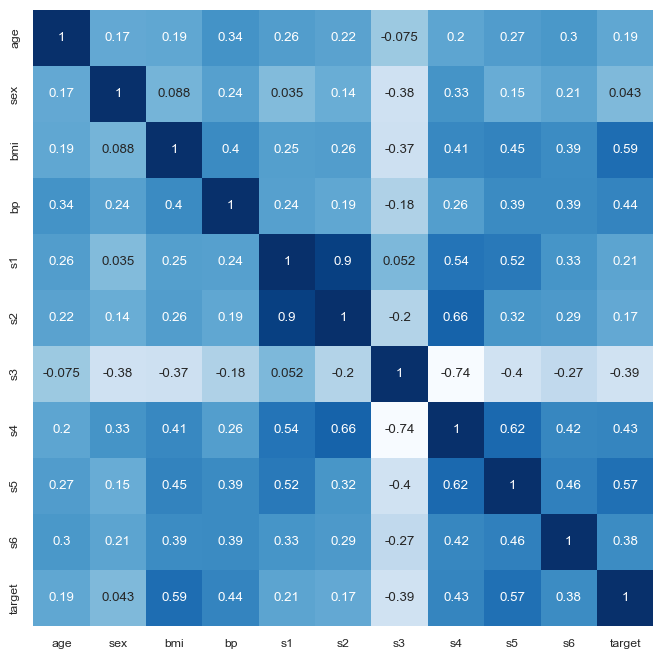

In [16]:
# 상관관계 시각화를 위한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 계산
correlation = data.corr()

# 상관관계를 시각화
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(correlation, annot=True, cbar=False, cmap='Blues')
plt.show()

In [17]:
# 음... 약하게 상관관계가 존재하네요. 독립변수와 종속변수 간 상관관계가 약한 경우 회귀를 사용하는 것은 좋지 못한 선택입니다.
# 하지만 오늘은 왜 좋지 못한 선택인지 한번 보여드릴게요.

# 일단 상관관계 값을 면밀히 살펴봅시다.
# 예상 외로 나이는 당뇨의 진행 정도와 관계가 없나봅니다.
# 특히 성별은 거의 관계가 없네요. 일단은 인지하고 특징 선택 없이 모델을 돌려봅시다.

### 2. 모델 불러오기 및 예측

In [18]:
# 학습 데이터를 훈련 데이터(train data)와 검증 데이터(test data)로 나누어봅시다

from sklearn.model_selection import train_test_split    # 라이브러리를 불러옵시다.

# 독립변수 지정
X = data.drop(["target"], axis=1)
Y = data["target"]

# train data와 test data를 이번에도 8:2로 나누어 줍시다.
# 데이터 분할 비율은 모델의 성능을 결정하는데 영향을 미칩니다.
# 오늘 수업에서 이야기한대로 데이터를 랜덤으로 나누는 것 또한 영향을 줍니다.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print('xtrain: ', xtrain.shape)
print('xtest: ', xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)

xtrain:  (353, 10)
xtest:  (89, 10)
ytrain:  (353,)
ytest:  (89,)


In [19]:
# 데이터가 준비되었으니 이제 모델을 학습시킵시다.
from sklearn.linear_model import LinearRegression

# 모델을 지정
model = LinearRegression()

# 모델을 학습
model.fit(xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(xtest)

In [20]:
# 이번에도 오차를 계산해주는 라이브러리를 불러 예측한 데이터가 실제 데이터와 얼마나 차이가 나는지 확인해봅시다.
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(ytest, y_pred)
MAE = mean_absolute_error(ytest, y_pred)
print(f"평균 제곱 오차: {MSE:.3f}")
print(f"평균 절대 오차: {MAE:.3f}")

평균 제곱 오차: 2992.581
평균 절대 오차: 41.975


- 오차가 무려 2992(...)네요.. 특징을 선택하면 나아질까요?

### 3. 특징 선택(feature selection) 및 모델 학습과 예측

In [21]:
# 아까 전에 유난히 상관관계가 낮았던 특징이 몇개 있습니다. 그걸 제거해봅시다.

price_corr = correlation.loc[:'s6', 'target'].abs().sort_values(ascending=False)
price_corr

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

In [22]:
# s1을 기점으로 상관관계가 크게 높아지는 것을 확인할 수 있습니다. 따라서 그 이상의 특징을 선택하여 모델을 돌려봅시다.

fs_data = data.drop(['s1', 'age', 's2', 'sex', 'target'], axis=1) # fs는 feature selection을 줄여서 넣어봤습니다(별 의미 없음)
fs_data.head()

,bmi,bp,s3,s4,s5,s6
0,0.061696,0.021872,-0.043401,-0.002592,0.019907,-0.017646
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068332,-0.092204
2,0.044451,-0.005670,-0.032356,-0.002592,0.002861,-0.025930
3,-0.011595,-0.036656,-0.036038,0.034309,0.022688,-0.009362
4,-0.036385,0.021872,0.008142,-0.002592,-0.031988,-0.046641


In [23]:
# 독립변수를 재정의하고 다시 모델을 훈련해봅시다.

# 독립변수 재정의
fs_X = fs_data

# 분리하는 비율은 동일(8:2)
fs_xtrain, fs_xtest, fs_ytrain, fs_ytest = train_test_split(fs_X, Y, test_size = 0.2, random_state = 1)

print('xtrain: ', fs_xtrain.shape)
print('xtest: ', fs_xtest.shape)
print('ytrain: ', fs_ytrain.shape)
print('ytest: ', fs_ytest.shape)

xtrain:  (353, 6)
xtest:  (89, 6)
ytrain:  (353,)
ytest:  (89,)


In [24]:
# 다시 한번 학습을 진행해봅시다.

# 모델을 지정
model = LinearRegression()

# 모델을 학습
model.fit(fs_xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(fs_xtest)

In [25]:
MSE = mean_squared_error(fs_ytest, y_pred)
MAE = mean_absolute_error(fs_ytest, y_pred)
print(f"평균 제곱 오차: {MSE:.3f}")
print(f"평균 절대 오차: {MAE:.3f}")

평균 제곱 오차: 3040.241
평균 절대 오차: 43.192


우리가 예측의 오차를 줄일 때 확인할 수 있는 것은 두가지 있습니다.
1. EDA를 통해 분석할 수 있는 데이터
2. 학습을 수행하는 모델

우리는 데이터를 분석하여 성능 향상에 기여하는데 실패했습니다. 그렇다면 모델의 문제는 아닐까요?

### 4. 의사결정나무(Decision Tree Regressor)를 이용한 학습과 예측

In [26]:
# 데이터가 준비되었으니 이제 모델을 학습시킵시다.
from sklearn.tree import DecisionTreeRegressor

# 모델을 지정
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=30, random_state=42)

# 모델을 학습
model.fit(xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(xtest)

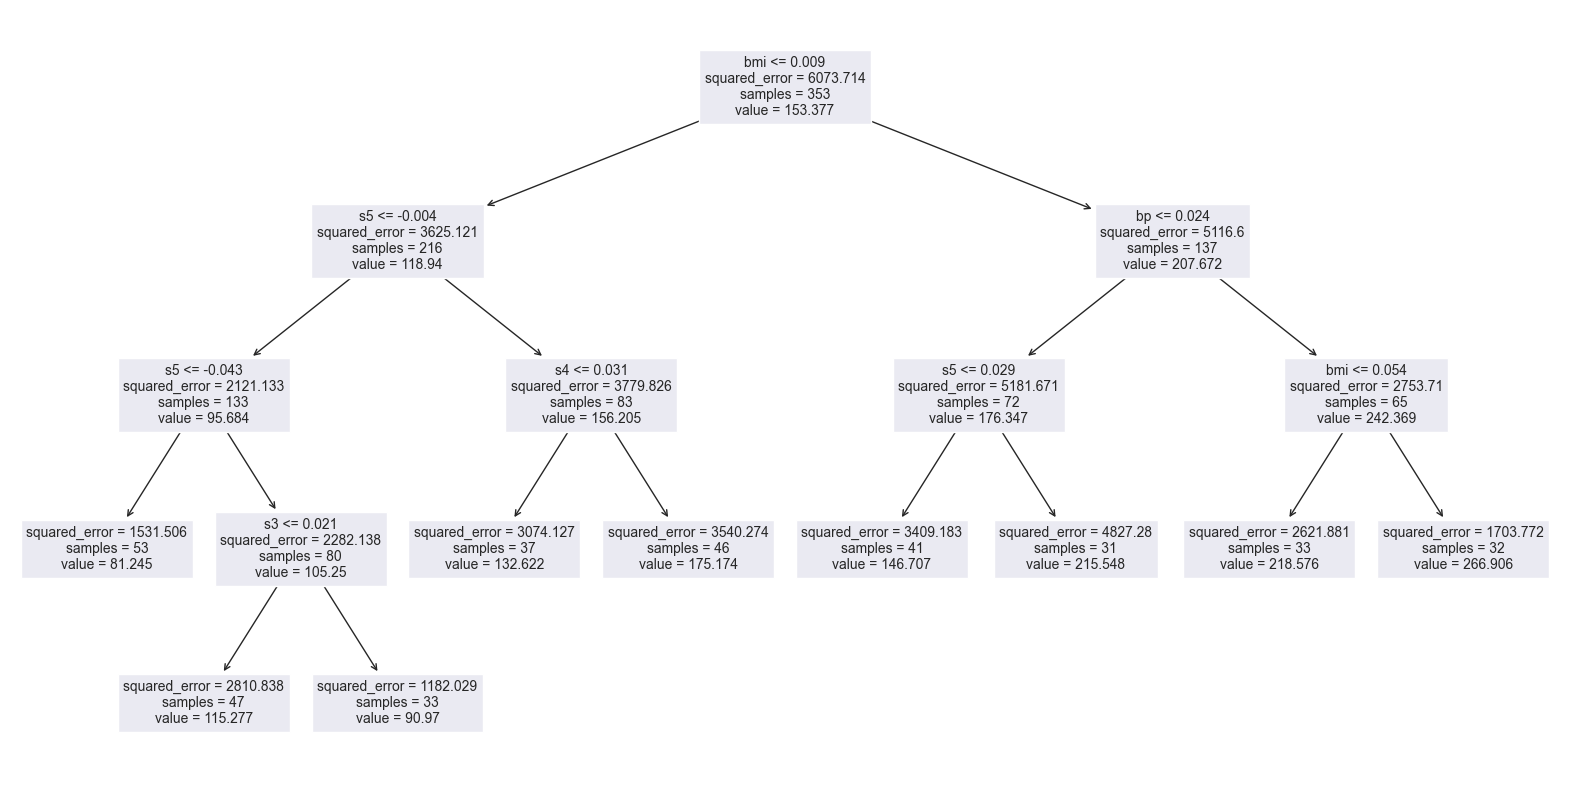

In [27]:
# 사실 의사결정나무가 직관적이지 못합니다. 우리가 사용하는 모델이 어떤 모습인지 시각화해서 확인해볼까요?
# 먼저, 시각화를 도와주는 라이브러리를 불러와서 시각화해봅시다.
from sklearn.tree import plot_tree

# 의사결정나무 시각화
plt.figure(figsize=(20,10))
plot_tree(model, max_depth=5, fontsize=10, feature_names=xtrain.columns)
plt.show()

In [28]:
# 모델이 저런 기준으로 값을 분류하는군요. 신기합니다.
# 그렇다면 오차는 얼마가 나오는지 확인해봅시다.

MSE = mean_squared_error(fs_ytest, y_pred)
MAE = mean_absolute_error(fs_ytest, y_pred)
print(f"평균 제곱 오차: {MSE:.3f}")
print(f"평균 절대 오차: {MAE:.3f}")

평균 제곱 오차: 4203.186
평균 절대 오차: 48.186


In [29]:
# 이런.. 성능이 별로 좋지 못하네요.
# 오늘 배웠던 랜덤포레스트를 떠올려봅시다. 다수결을 사용하여 의사결정 나무의 성능을 끌어올린다고 했는데 기억 나시나요?
# 이번에는 랜덤포레스트를 사용하여 다시 한번! 예측을 수행해봅시다.

In [30]:
from sklearn.ensemble import RandomForestRegressor

# 모델을 지정
model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=30, random_state=42)

# 모델을 학습
model.fit(xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(xtest)

In [31]:
MSE = mean_squared_error(fs_ytest, y_pred)
MAE = mean_absolute_error(fs_ytest, y_pred)
print(f"평균 제곱 오차: {MSE:.3f}")
print(f"평균 절대 오차: {MAE:.3f}")

평균 제곱 오차: 3511.781
평균 절대 오차: 45.443


In [32]:
# 확실히 성능에 개선이 있었지만.. 선형 회귀에 비하면 만족스러운 결과는 아닌 것 같습니다.
# 각 모델의 함수 안에 들어있는 변수는 모델의 성능을 바꾸는데 도움이 됩니다.
# 시간이 나신다면 각 값들을 조절하면서 어떤 값이 의사결정나무의 어떤 부분을 결정하는지 확인해보시면 좋을 것 같습니다.

- 사실 의사결정나무는 분류와 예측에 모두 사용할 수 있지만, 예측에서의 성능은 별로 좋지 못합니다.
- 다음 시간에는 의사결정나무가 주로 사용되는 분류를 수행해보겠습니다.
- 오늘도 정말 고생이 많으셨고, 다음시간에 봬요 :)
